# Machine Learning Final Project

## Importing Libraries

In [41]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

# Preliminary Data Analysis

Load in the training and test data.

In [53]:
#training data
train = pd.read_csv("train.csv")
print(train.head()) #print the first few rows
print("Train shape: ")
print(train.shape) #look at the shape of the training data

#test data test
test = pd.read_csv("test.csv")
print(test.head()) #print the first few rows
print("Test shape: ")
print(test.shape) #look at the shape of the test data

   Unnamed: 0 Kingdom  DNAtype  SpeciesID  Ncodons  \
0         872     vrl        0     207343     6686   
1        9865     inv        0       7629    10060   
2        3190     bct        0     320850    14031   
3        3674     bct        0       1397    39839   
4       11372     vrt        1      50790     5112   

                            SpeciesName      UUU      UUC      UUA      UUG  \
0                    Bovine foamy virus  0.01541  0.00927  0.01720  0.01825   
1              Anthocidaris crassispina  0.01213  0.02515  0.00268  0.01352   
2               Staphylococcus phage X2  0.02580  0.01618  0.03606  0.01354   
3                    Bacillus circulans  0.00128  0.02141  0.01225  0.01649   
4  mitochondrion Dascyllus trimaculatus  0.03169  0.01780  0.03893  0.00000   

   ...      CGG      AGA      AGG      GAU      GAC      GAA      GAG  \
0  ...  0.00643  0.02064  0.01182  0.02812  0.00838  0.03365  0.01974   
1  ...  0.00268  0.00915  0.01412  0.03280  0.02555  0

### Data pre processing
There should be a total of 69/68 columns: 67 attributes (64/63 codons, SpeciesName, SpeciesID, and Ncodons) and 2 specifying the classification of the sample (Kingdom and DNAtype). The amount of columns for codons differs because the column for the AGA codon is missing in the test data. There's seems to be an additional column in the train and test object (Unnamed: 0), so I remove it here. I also remove columns SpeciesName and SpeciesID, becuase they are unique to each row and therefore not meaningful to the problem.

In [54]:
train=train.drop(columns='Unnamed: 0') #drop the specified columns
train=train.drop(columns='SpeciesName')
train=train.drop(columns='SpeciesID')
print(train.head()) 
test=test.drop(columns='Unnamed: 0') #drop the specified columns
test=test.drop(columns='SpeciesName')
test=test.drop(columns='SpeciesID')
print(test.head())

  Kingdom  DNAtype  Ncodons      UUU      UUC      UUA      UUG      CUU  \
0     vrl        0     6686  0.01541  0.00927  0.01720  0.01825  0.01436   
1     inv        0    10060  0.01213  0.02515  0.00268  0.01352  0.01372   
2     bct        0    14031  0.02580  0.01618  0.03606  0.01354  0.00848   
3     bct        0    39839  0.00128  0.02141  0.01225  0.01649  0.01330   
4     vrt        1     5112  0.03169  0.01780  0.03893  0.00000  0.06240   

       CUC      CUA  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.02303  0.01555  ...  0.00643  0.02064  0.01182  0.02812  0.00838   
1  0.01143  0.00775  ...  0.00268  0.00915  0.01412  0.03280  0.02555   
2  0.02067  0.01041  ...  0.00114  0.01775  0.00499  0.03756  0.02523   
3  0.01308  0.00399  ...  0.01177  0.00705  0.00422  0.03316  0.02229   
4  0.01056  0.05262  ...  0.00000  0.00000  0.00000  0.00020  0.01389   

       GAA      GAG      UAA      UAG      UGA  
0  0.03365  0.01974  0.01511  0.00030  0.00030  
1  0.0

Next I check to see if there is any missing data. The project specification says that aside from the missing AGA column of the test data, there should not be any missing data, so this acts as a sanity check to ensure the data is as intended.

In [55]:
#check how many samples with missing values there are in
(pd.isna(train).sum()>0).sum() #the train data
(pd.isna(test).sum()>0).sum() #and the test data

0

0

Here I take the train and test data and split into X, containing the features, and y_kingdom and y_dnatype, containing the classifications.

In [57]:
X_features=['Ncodons', 'UUU', 'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'] #all the feature columns present in the training data
X_train=train[X_features] #put in our X for training only the columns containing features
X_train.shape #verify that there are now 67 columns

X_features.remove('AGA') #remove the AGA column since it is not present in the test data
X_test=test[X_features] #put in our X for test only the columns containing features
X_test.shape #verify that there are now 66 columns

#grab the columns containing the classification data
y_train_kingdom=train['Kingdom']
y_train_dnatype=train['DNAtype']
y_test_kingdom=test['Kingdom']
y_test_dnatype=test['DNAtype']


(10422, 65)

(2606, 64)

Here, I use LabelBinarizer to represent the classifications as one-hot encodings.

In [58]:
from sklearn.preprocessing import LabelBinarizer

# Convert kingdom into a one-hot encoding
y_train_kingdom = LabelBinarizer().fit_transform(y_train_kingdom)
y_test_kingdom = LabelBinarizer().fit_transform(y_test_kingdom)
# Convert dnatype into a one-hot encoding
y_train_dnatype = LabelBinarizer().fit_transform(y_train_dnatype)
y_test_dnatype = LabelBinarizer().fit_transform(y_test_dnatype)
y_train_kingdom

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Data Visualization
Here I use the training data including the classifications to produce a heatmap to visualize the correlations between aspects of the data. Although it would be possible to also produce a pair plot, due to the amount of features I chose not to.

<Figure size 1500x1500 with 0 Axes>

<Axes: >

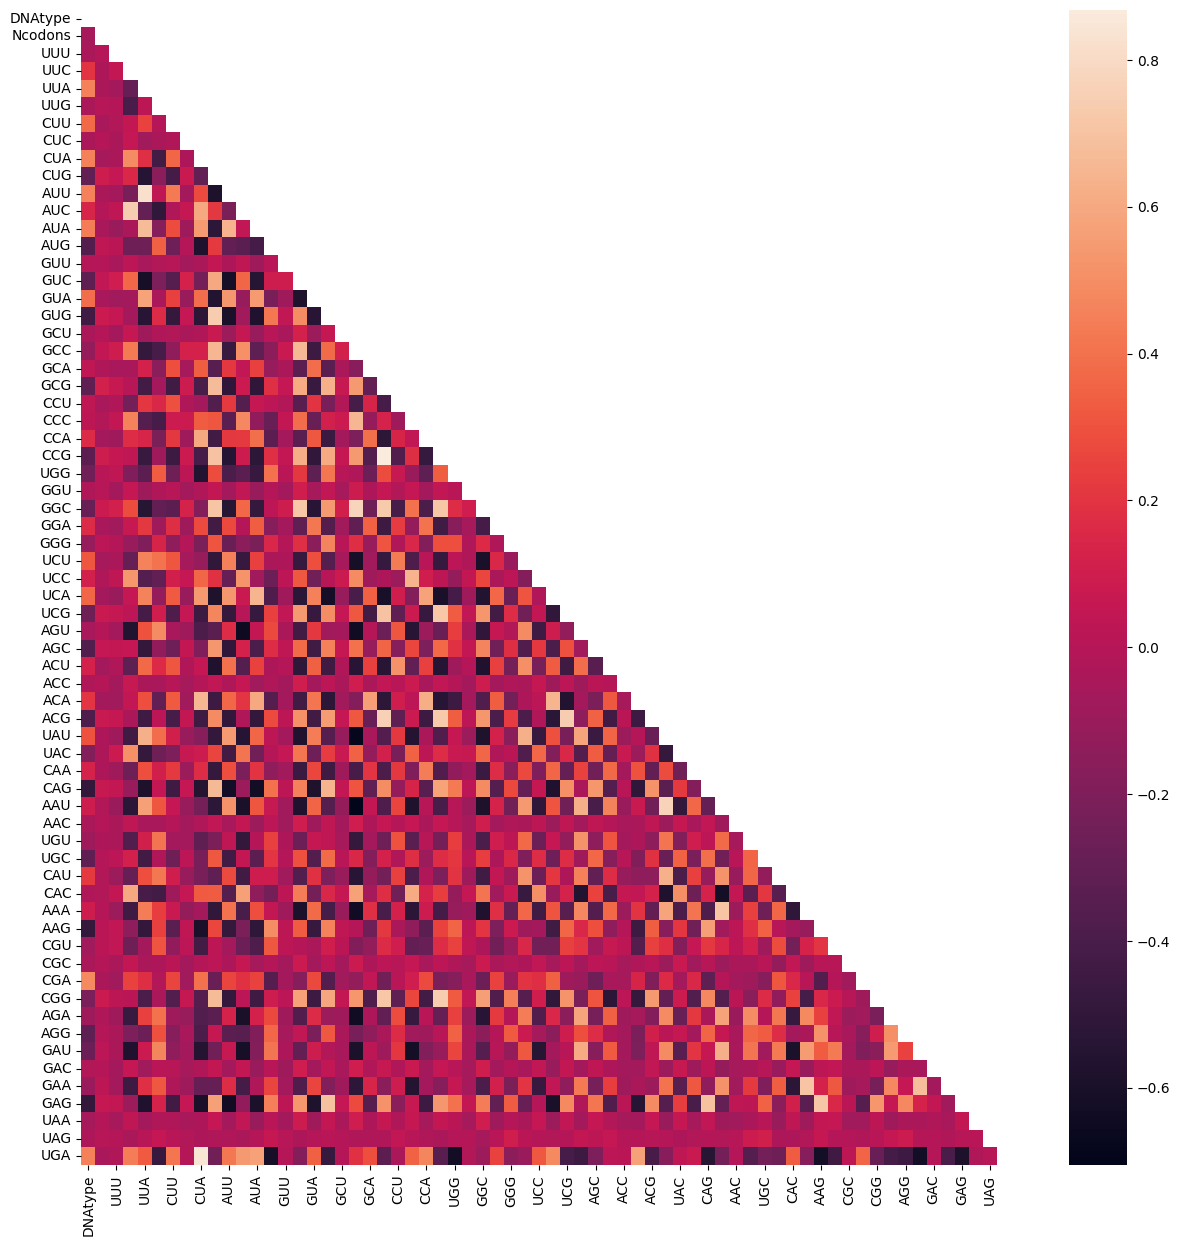

<Figure size 1500x1500 with 0 Axes>

<Axes: >

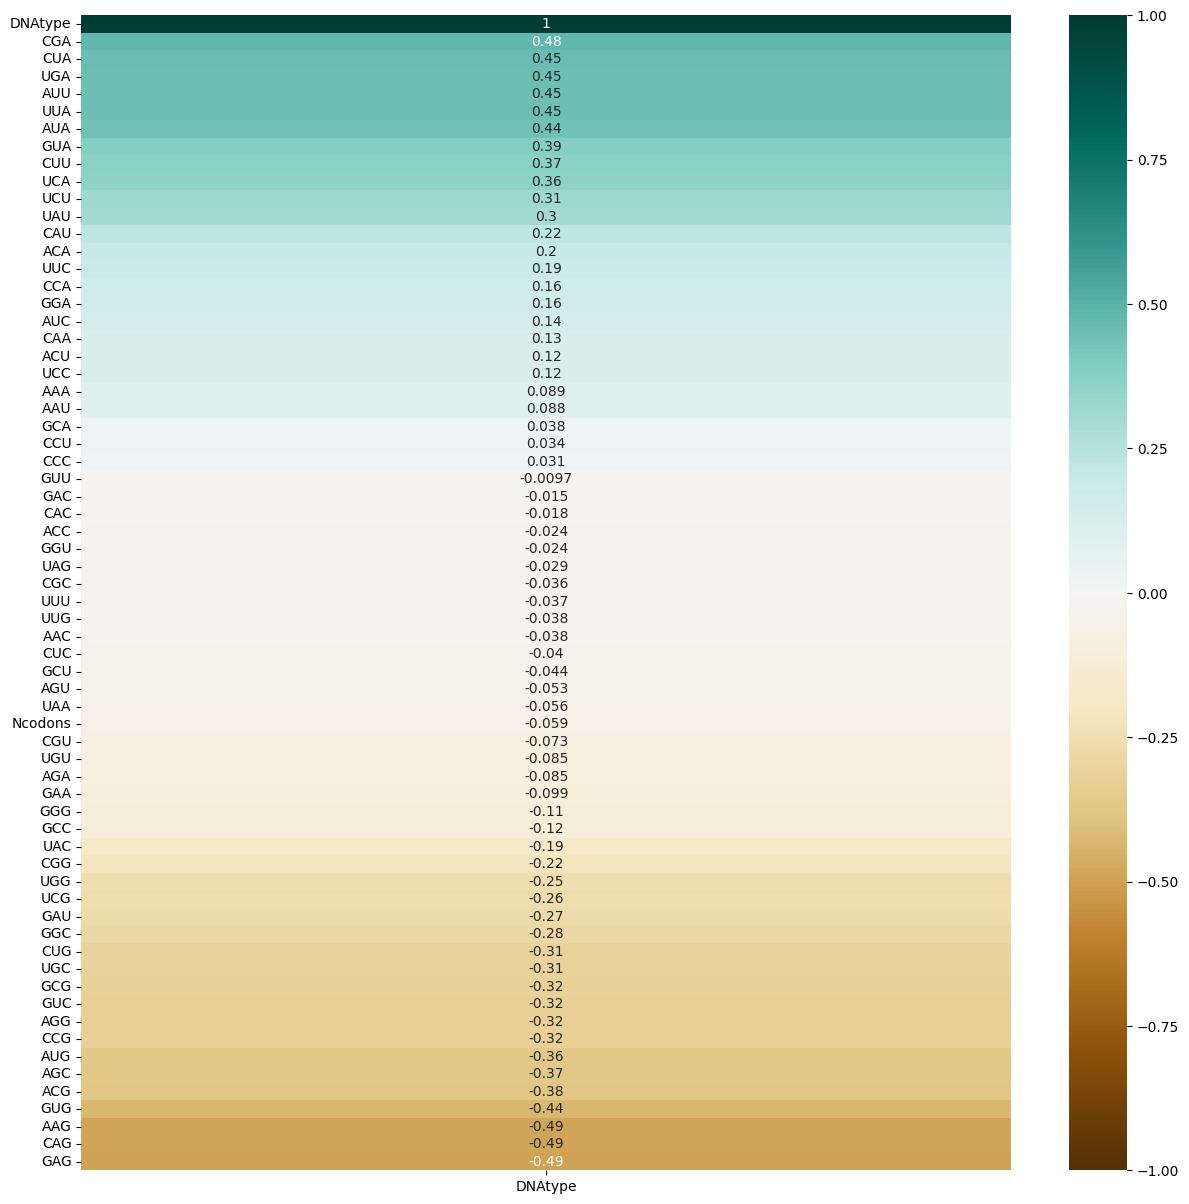

ValueError: could not convert string to float: 'vrl'

In [67]:
corr = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
%matplotlib inline
#display the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, mask=mask)
plt.show()
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(numeric_only=True)[['DNAtype']].sort_values(by='DNAtype', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()
sns.heatmap(train.corr()[['Kingdom']].sort_values(by='Kingdom', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#TODO: convert y data into additional pandas data frames, and columns names, then concatenate back with the x_train and use that to develop more correlation matrix

### Dimensionality Reduction for Visualization

In [13]:
from sklearn.manifold import TSNE
def plot3d(X, labels):
    # Set matplotlib to generate static images
    # %matplotlib inline
    # Set matplotlib as interactive
    %matplotlib ipympl
    # This import is required to set up the 3D environment
    from mpl_toolkits.mplot3d import Axes3D
    
    tsne = TSNE(n_components=3)
    # We consire images as simple vectors of 64 features, reshape using the X.shape[0] information
    X = X.reshape(X.shape[0], -1)
    # Reduce features dimensionality, just for visualization
    # purpuses
    X = tsne.fit_transform(X)
    
    unique_labels = np.unique(labels)
    # Convert negative values (outliers) into positive
    labels = labels.copy()
    labels += np.abs(unique_labels.min())
    nlabels = len(unique_labels)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
          ('tab20' if nlabels <= 20 else
           'hsv'))
    cmap = plt.cm.get_cmap(col)
    smap = cm.ScalarMappable(
              norm=mcolors.Normalize(unique_labels.min(), unique_labels.max()+1), 
              cmap=cmap)
    # Plot the 3d coordinates (similar to standard scatter plots, we just
    # need to provide an additional z coordinate!)
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], c=labels, cmap=cmap)
    # Plot a color bar on the right
    plt.colorbar(mappable=smap, label='digit label', ticks=range(nlabels))
    
plot3d(X_train.to_numpy(), labels=y_train_kingdom)

ValueError: could not convert string to float: 'Bovine foamy virus'

## Clustering Analysis

# Classification